In [1]:
import pandas as pd

Interiors= pd.read_csv("data_pre/Interiors.csv")
Books = pd.read_csv("data_pre/Books.csv")
Appliances = pd.read_csv("data_pre/Appliances.csv")
Life_health = pd.read_csv("data_pre/Life_health.csv")
Sports = pd.read_csv("data_pre/Sports.csv")
Foods = pd.read_csv("data_pre/Foods.csv")
Convenience = pd.read_csv("data_pre/Convenience.csv")
Clothes = pd.read_csv("data_pre/Clothes.csv")
Accessories = pd.read_csv("data_pre/Accessories.csv")
Cosmetics = pd.read_csv("data_pre/Cosmetics.csv")
Parenting = pd.read_csv("data_pre/Parenting.csv")
Weather = pd.read_csv("data_pre/weather.csv")
All_data = pd.read_csv("data_pre/all_data.csv")

In [2]:
import matplotlib.pyplot as plt


# Prophet 

In [3]:
from fbprophet import Prophet

# 콘다 관리자 권한으로 설치 해야함 

c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
def prop_predict(df, col):
    from fbprophet import Prophet
    import matplotlib.pyplot as plt
    import pandas as pd

    df_tmp = df.groupby('방송일자').sum().reset_index()
    prop_df = df_tmp[['방송일자', df_tmp.columns[col]]]
    prop_df = prop_df.rename(columns= {'방송일자' :'ds', df_tmp.columns[col] : 'y'})
    prop_df.ds = pd.to_datetime(prop_df.ds)

    #공휴일 
    holidays = pd.DataFrame({
    'holiday': 'playoff',
    'ds': pd.to_datetime(['2022-01-01', '2022-01-31', '2022-02-01',
                        '2022-02-02', '2022-05-05', '2022-05-08',
                        '2022-06-06', '2022-08-15', '2022-09-09',
                        '2022-09-10', '2022-09-11', '2022-09-12',
                        '2022-10-03', '2022-10-09', '2022-10-10',
                        '2022-12-25', '2023-01-01', '2023-01-21',
                        '2023-01-22', '2023-01-23', '2023-01-24',
                        '2023-03-01', '2023-05-05', '2023-05-27',
                            '2023-06-06', '2023-08-15', '2023-09-28',
                            '2023-09-29', '2023-09-30', '2023-10-03',
                            '2023-10-09']),
    'lower_window': 0,
    'upper_window': 1,
    })

    #모델적용
    model_prop = Prophet(holidays = holidays,changepoint_range=0.9)
    model_prop.fit(prop_df)

    #예측할 미래 데이터 프레임 만든다.
    future = model_prop.make_future_dataframe(periods=365)

    #예측 
    forecast = model_prop.predict(future)


    fig1 = model_prop.plot(forecast)

    fig2 = model_prop.plot_components(forecast)




INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:

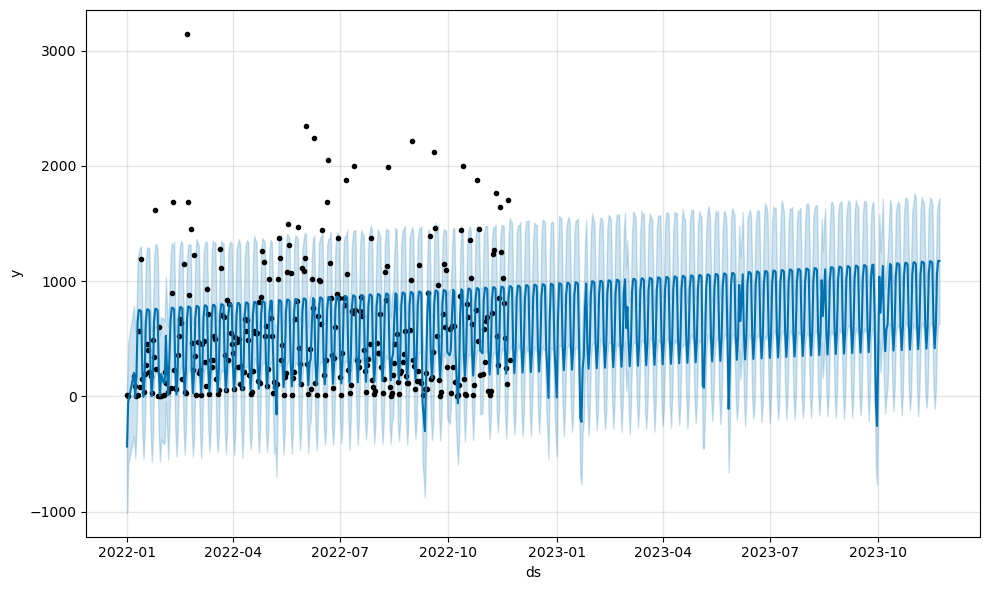

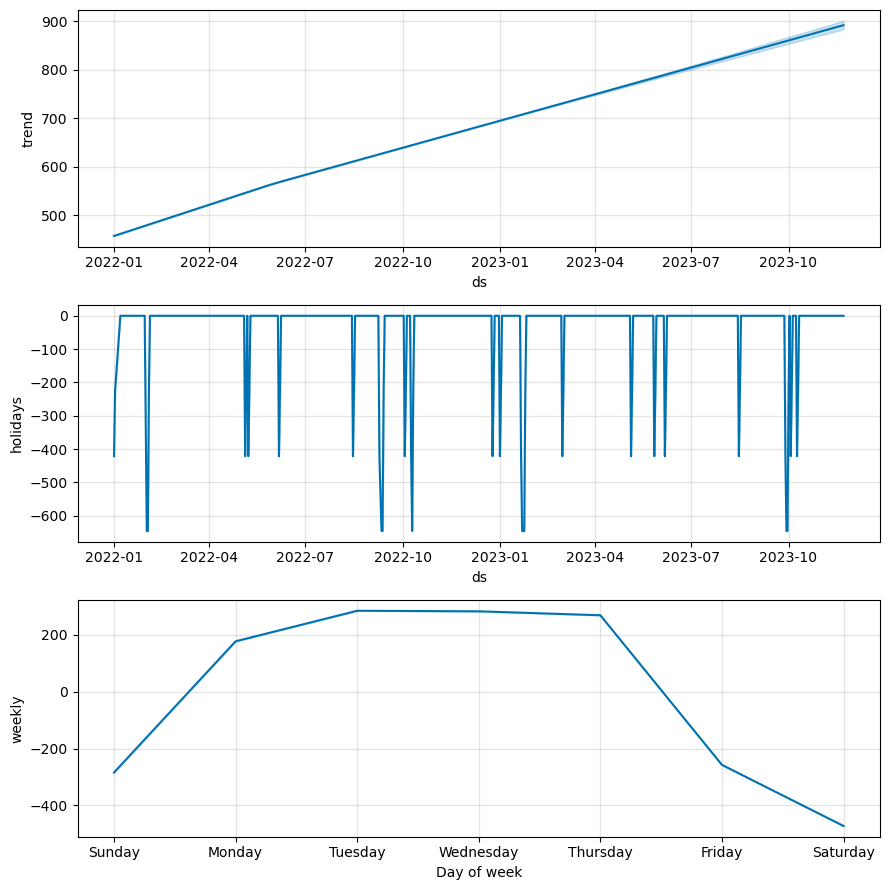

In [43]:
prop_predict(Interiors, 3)

In [7]:
df = All_data.copy()

In [8]:
tmp = df.groupby('방송일자').sum()

In [9]:
prop_tmp = tmp.reset_index()

In [32]:
prop_sell = prop_tmp[['방송일자', prop_tmp.columns[3]]]
prop_sell = prop_sell.rename(columns= {'방송일자' :'ds', prop_tmp.columns[3] : 'y'})
prop_sell.ds = pd.to_datetime(prop_sell.ds)


In [30]:
holidays = pd.DataFrame({
'holiday': 'playoff',
'ds': pd.to_datetime(['2022-01-01', '2022-01-31', '2022-02-01',
                      '2022-02-02', '2022-05-05', '2022-05-08',
                      '2022-06-06', '2022-08-15', '2022-09-09',
                      '2022-09-10', '2022-09-11', '2022-09-12',
                      '2022-10-03', '2022-10-09', '2022-10-10',
                      '2022-12-25', '2023-01-01', '2023-01-21',
                      '2023-01-22', '2023-01-23', '2023-01-24',
                       '2023-03-01', '2023-05-05', '2023-05-27',
                        '2023-06-06', '2023-08-15', '2023-09-28',
                         '2023-09-29', '2023-09-30', '2023-10-03',
                          '2023-10-09']),
'lower_window': 0,
'upper_window': 1,
})

In [33]:
model_prop = Prophet(holidays = holidays,changepoint_range=0.9)
model_prop.fit(prop_sell)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [34]:
future = model_prop.make_future_dataframe(periods=365)


In [35]:
forecast = model_prop.predict(future)


c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


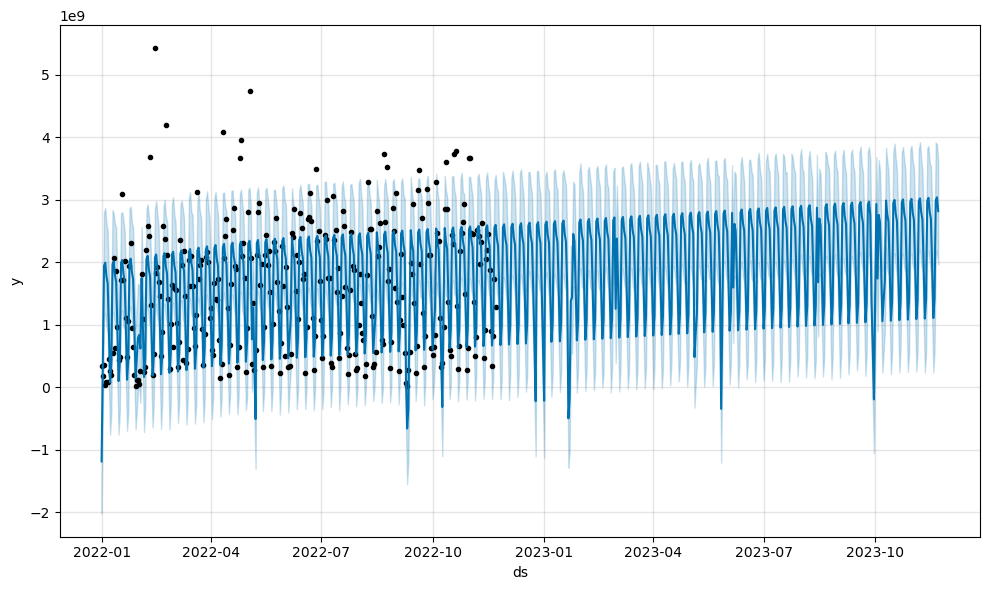

In [36]:
fig1 = model_prop.plot(forecast)

- forecast component 시각화(Trend, Weakly, Yearly)


c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


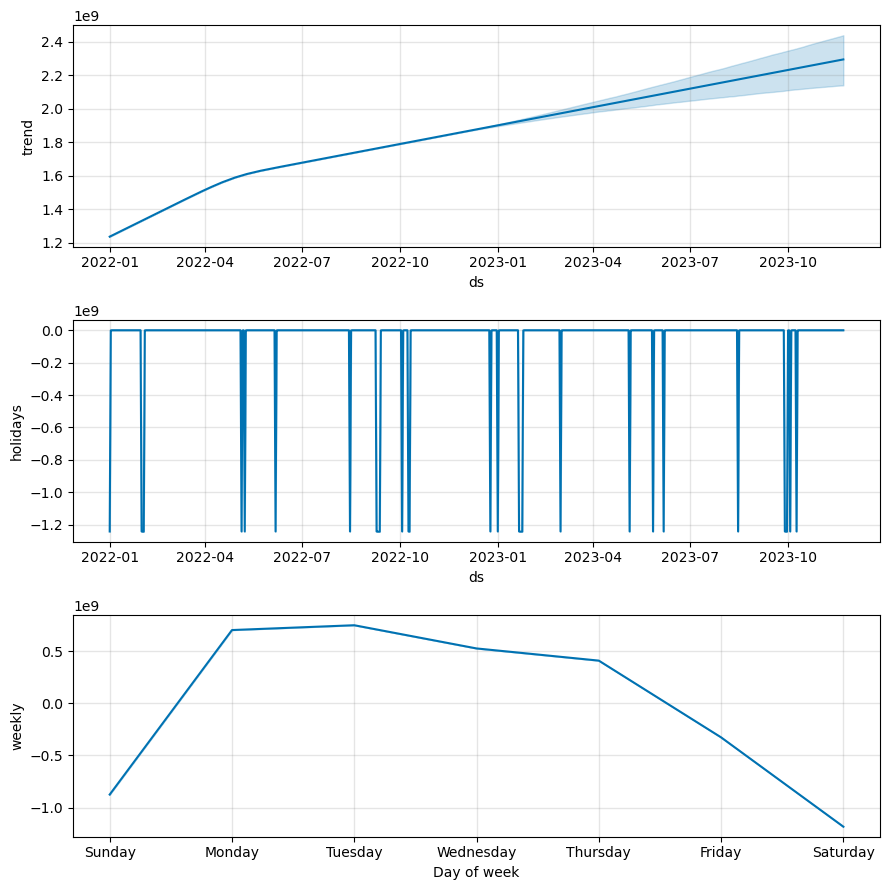

In [39]:
fig2 = model_prop.plot_components(forecast)